In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Exploratory Data Analysis

In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Targeting on the basis of Spending Score

In [7]:
len(data[data['Spending Score (1-100)']>80])  # For costly products

30

In [8]:
len(data[(data['Spending Score (1-100)']<80) & (data['Spending Score (1-100)']>50)]) # Middle price products

67

In [9]:
len(data[data['Spending Score (1-100)']<50])  # For cheap products

98

# Targeting on the basis of Gender
# Count of Male and Female

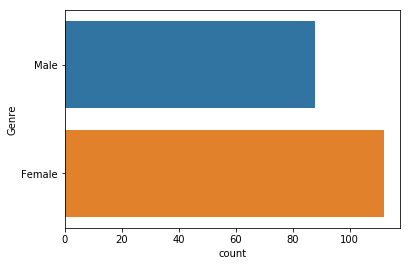

In [36]:
sns.countplot(y='Genre',data=data)
plt.show()

In [34]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [37]:
high=data[data['Spending Score (1-100)']>80]

In [40]:
cheap=data[data['Spending Score (1-100)']<50]

In [39]:
high.groupby('Genre')['Spending Score (1-100)'].mean()

Genre
Female    89.375000
Male      90.214286
Name: Spending Score (1-100), dtype: float64

In [43]:
cheap.groupby('Genre')['Spending Score (1-100)'].mean()

Genre
Female    31.500000
Male      25.840909
Name: Spending Score (1-100), dtype: float64

# Age vs Annual Income w.r.t to Gender

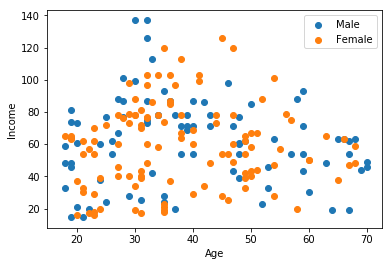

In [11]:
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=data[data['Genre']==gender],label=gender)
    
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()
    

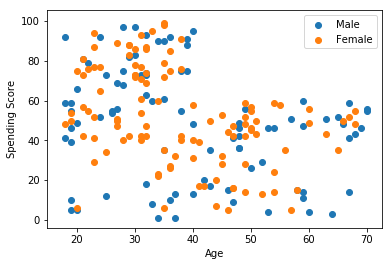

In [12]:
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Spending Score (1-100)',data=data[data['Genre']==gender],label=gender)
    
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.show()
    

# Clustering using K Means

In [3]:
from sklearn.cluster import KMeans
import numpy as np

In [4]:
X=data[['Annual Income (k$)','Spending Score (1-100)']].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
inertia=[]
for i in range(1,11):
    km=(KMeans(n_clusters=i,max_iter=300))
    km.fit(X)
    inertia.append(km.inertia_)

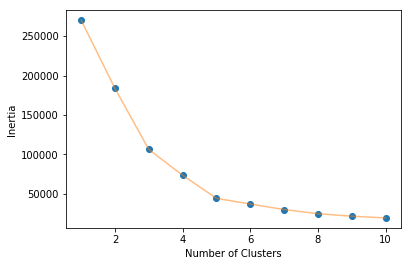

In [7]:
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Lets give n clusters=5

In [36]:
km=KMeans(n_clusters=5)

In [37]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
labels=km.labels_

In [39]:
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [40]:
centroids=km.cluster_centers_

In [41]:
centroids

array([[25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571]])

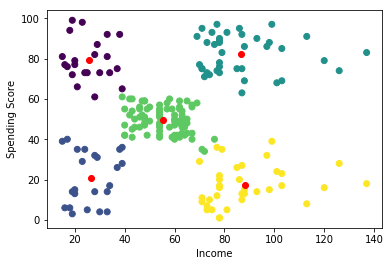

In [42]:
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,c=labels)
plt.scatter(x=centroids[:,0],y=centroids[:,1],c='red')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()